In [42]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import  accuracy_score, classification_report

### プロスペクト理論

主観確率の癖を非線形関数で表現して実データからフィッティングする流れについて整理

#### 確率加重関数（probability weighting function）
$$
w(p) = \frac{{{p^\gamma }}}{{{{\left\{ {{p^\gamma } + {{\left( {1 - p} \right)}^\gamma }} \right\}}^{1/\gamma }}}}
$$

In [12]:
def pwfun(p, g):
    return p**g/pow((p**g+(1-p)**g), 1/g)

Text(0, 0.5, 'w(p)')

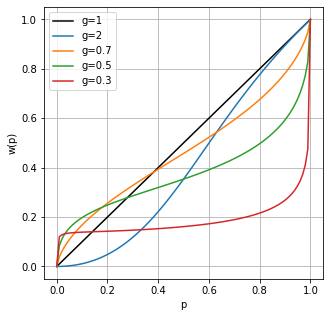

In [20]:
p = np.linspace(0.0, 1.0, 100)

# ガンマを変動させた時の出力結果を算出
w1 = pwfun(p, 1)
w2 = pwfun(p, 2)
w07 = pwfun(p, 0.7)
w05 = pwfun(p, 0.5)
w03 = pwfun(p, 0.3)


fig = plt.subplots(figsize=(5,5))
plt.plot(p, w1, label="g=1", color='k')
plt.plot(p, w2, label="g=2")
plt.plot(p, w07, label="g=0.7")
plt.plot(p, w05, label="g=0.5")
plt.plot(p, w03, label="g=0.3")
plt.legend()
plt.grid()
plt.xlabel('p')
plt.ylabel('w(p)')

In [30]:
# 実際の確率
prob_a = np.array([0,1,2,5,10,20,50,80,90,95,98,99,100])

# 主観確率
prob_s = np.array([0,5.5,8.1,13.2,18.6,26.1,42.1,60.1,71.2,79.3,87.1,91.2,100])

In [31]:
print(len(prob_a),len(prob_s))

13 13


In [32]:
prob_an = prob_a/100
prob_sn = prob_s/100
p = np.linspace(0.0, 1.0, 100)

Text(0, 0.5, 'w(p)')

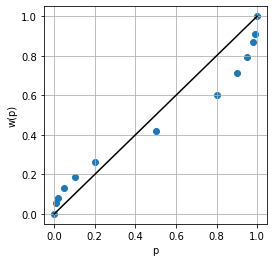

In [33]:
fig = plt.subplots(figsize=(4,4))
plt.scatter(prob_an, prob_sn)
plt.plot(p, p, color='k')
plt.grid()
plt.xlabel('p')
plt.ylabel('w(p)')

In [34]:
# カーブフィッティング
param, cov = opt.curve_fit(pwfun, prob_an, prob_sn, p0=[0.5,])

In [35]:
# データに紐づくgammaの推定結果
param[0]

0.608528774547399

Text(0, 0.5, 'w(p)')

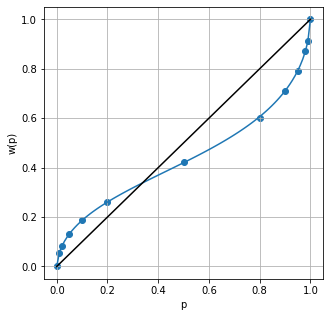

In [36]:
# 推定したパラメータによる主観的確率の表現
wo = pwfun(p, param[0])

fig = plt.subplots(figsize=(5,5))
plt.plot(p,wo)
plt.plot(p,w1, color='k')
plt.scatter(prob_an, prob_sn)
plt.grid()
plt.xlabel('p')
plt.ylabel('w(p)')

### アンカリング効果と信頼区間

In [39]:
np.random.seed(123)
num = 100
meanL, stdL = 3, 2.0
biasL = 0.5
meanH, stdH = 5, 3.0
xL = stats.norm.rvs(loc=meanL+biasL, scale=stdL, size=num)
xH = stats.norm.rvs(loc=meanH, scale=stdH, size=num)

In [40]:
df_tmp = pd.DataFrame({'L':xL, 'H':xH})
print(df_tmp.head())
df = df_tmp.melt(var_name='class', value_name='data')

          L          H
0  1.328739   6.926164
1  5.494691  -0.933664
2  4.065957   7.136794
3  0.487411  12.794912
4  2.342799   4.926122


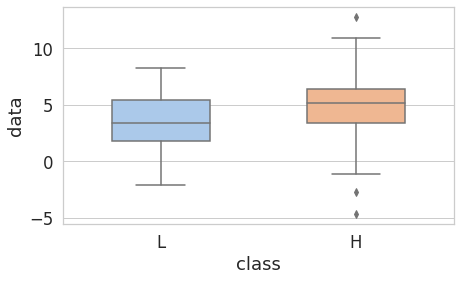

In [43]:
sns.set_theme(style='whitegrid', font_scale=1.5)

plt.figure(figsize=(7,4))
sns_boxplot = sns.boxplot(x="class", y="data", data=df, width=0.5, palette='pastel')

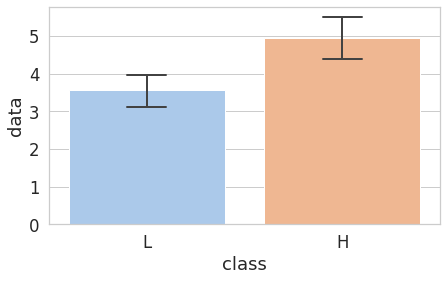

In [44]:
plt.figure(figsize=(7,4))
sns_barplot = sns.barplot(x='class', y='data', data=df, capsize=0.2, errwidth=2.0, 
                          palette='pastel')

<Figure size 864x288 with 0 Axes>

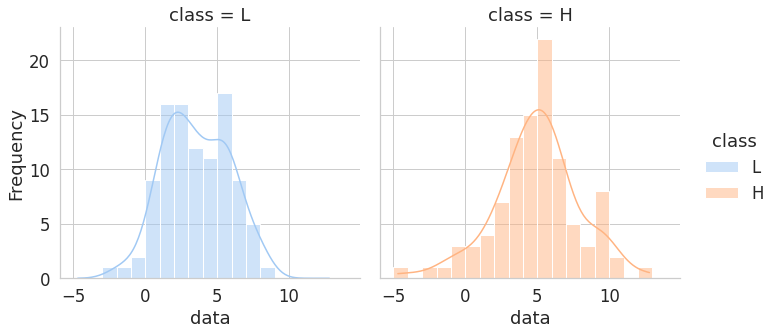

In [45]:
plt.figure(figsize=(12,4))
sns_displot = sns.displot(data=df, x='data', hue='class', col='class', bins=range(-5, 15, 1), kde=True, palette='pastel')
sns_displot.set_ylabels('Frequency')

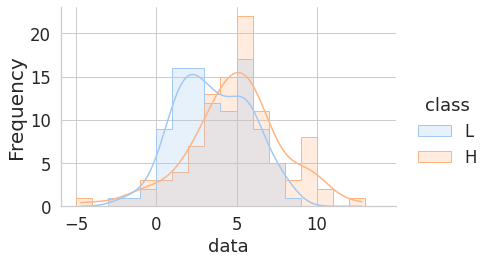

In [46]:
g = sns.displot(data=df, x='data', hue='class', bins=range(-5,15,1), element='step', kde=True, palette='pastel', height=4, aspect=1.5)
g.set_ylabels('Frequency', fontsize=20)